# All Plant Disease Classification with CNN: use sample dataset

## 1. Select 152 images from each category

In [1]:
import os, random, shutil

src = "C:/Users/ekadw/Documents/DATA/Leaf_Disease/PlantVillage"
dest = "C:/Users/ekadw/Documents/DATA/Leaf_Disease/PlantVillage_152"
n_per_class = 152  # adjust if you want fewer/more

os.makedirs(dest, exist_ok=True)
for cls in os.listdir(src):
    cls_src = os.path.join(src, cls)
    cls_dest = os.path.join(dest, cls)
    os.makedirs(cls_dest, exist_ok=True)
    images = os.listdir(cls_src)
    random.shuffle(images)
    selected = images[:n_per_class]
    print(f"{cls}: copying {len(selected)} images.")
    for img in selected:
        shutil.copy(os.path.join(cls_src, img), os.path.join(cls_dest, img))

Pepper__bell___Bacterial_spot: copying 152 images.
Pepper__bell___healthy: copying 152 images.
Potato___Early_blight: copying 152 images.
Potato___healthy: copying 152 images.
Potato___Late_blight: copying 152 images.
Tomato_Bacterial_spot: copying 152 images.
Tomato_Early_blight: copying 152 images.
Tomato_healthy: copying 152 images.
Tomato_Late_blight: copying 152 images.
Tomato_Leaf_Mold: copying 152 images.
Tomato_Septoria_leaf_spot: copying 152 images.
Tomato_Spider_mites_Two_spotted_spider_mite: copying 152 images.
Tomato__Target_Spot: copying 152 images.
Tomato__Tomato_mosaic_virus: copying 152 images.
Tomato__Tomato_YellowLeaf__Curl_Virus: copying 152 images.


## 2. Load the selected dataset into TensorFlow

In [2]:
import tensorflow as tf

IMG_SIZE = (128, 128)
BATCH_SIZE = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

Found 2280 files belonging to 15 classes.
Using 1824 files for training.
Found 2280 files belonging to 15 classes.
Using 456 files for validation.
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dest,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)
class_names = train_ds.class_names
num_classes = len(class_names)

Found 2280 files belonging to 15 classes.
Using 1824 files for training.


## 3. Create simple CNN model architecture

In [4]:
from tensorflow.keras import layers, models

def make_simple_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

num_classes = len(train_ds.class_names)
model = make_simple_cnn(IMG_SIZE + (3,), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,831 (14.14 MB)

 Trainable params: 3,706,831 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the CNN model

In [5]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.1068 - loss: 68.9291 - val_accuracy: 0.1469 - val_loss: 2.6427
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.1303 - loss: 2.6323 - val_accuracy: 0.1864 - val_loss: 2.5393
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.1525 - loss: 2.5520 - val_accuracy: 0.1689 - val_loss: 2.5677
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.1712 - loss: 2.4819 - val_accuracy: 0.1996 - val_loss: 2.5450
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.2143 - loss: 2.3731 - val_accuracy: 0.2061 - val_loss: 2.5487
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.2410 - loss: 2.3391 - val_accuracy: 0.2018 - val_loss: 2.5724
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.2709 - loss: 2.1993 - val_accuracy: 0.2675 - val_loss: 2.4572
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.2975 - loss: 

## 5. Evaluate the CNN model

In [6]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.3f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3093 - loss: 2.3378
Validation accuracy: 0.287


## 6. Plot the learning curve

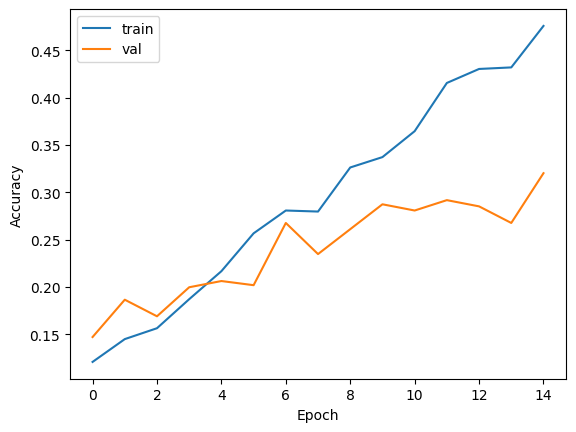

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 7. Make predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


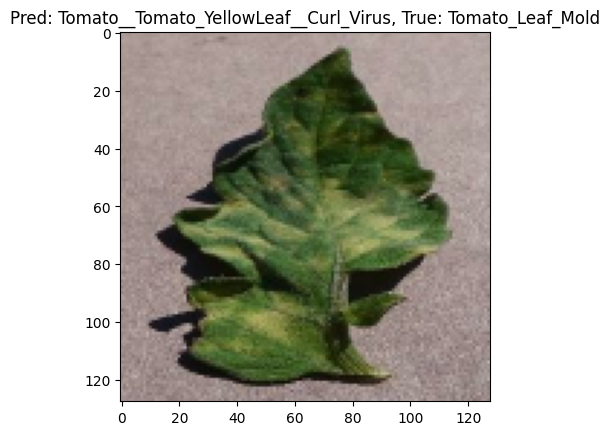

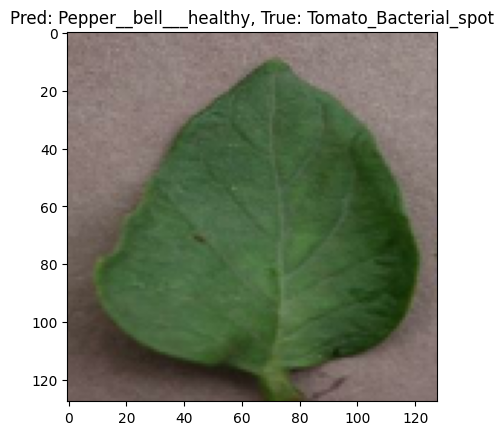

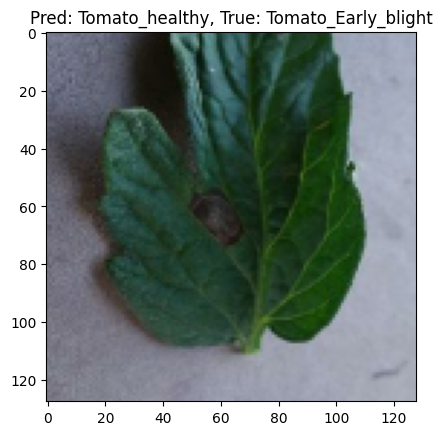

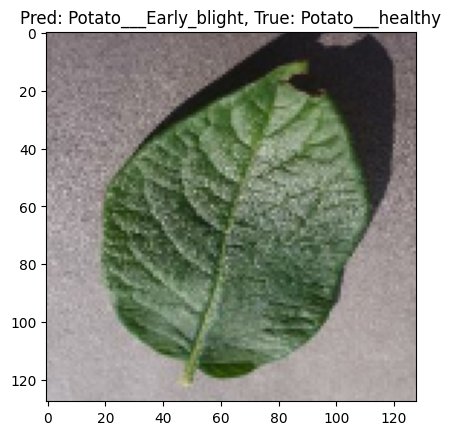

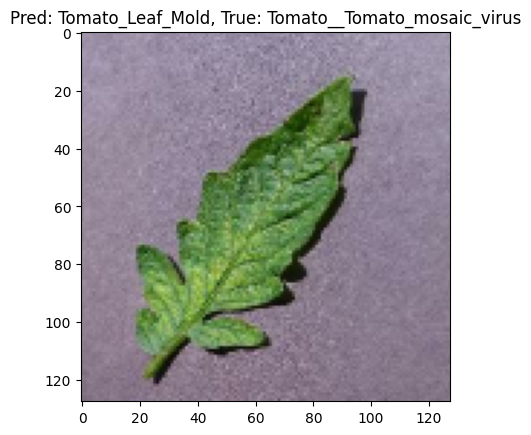

In [8]:
import numpy as np

class_names = train_ds.class_names

for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[np.argmax(preds[i])]}, True: {class_names[np.argmax(labels[i])]}")
        plt.show()

## Conclusion
1. The accuracy is too low. One might be caused by the lack number of dataset for each category.
2. Next, the minority target data number will be increased into 1500 images through augmentation meanwhile the category that has larger than 1500 images, they will be undersampled.